#### Disclaimer: The dataset may have some minor modifications for educational purposes. 

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.

There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images.

#### You are asked to train a model with following steps:
1. Download, extract and load CIFAR10 image dataset using torchvision
2. Show random batches of images in a grid using torchvision.utils.make_grid
3. Create a convolutional neural network using with nn.Conv2d and nn.MaxPool2d layers
4. Train a convolutional neural network and visualize the losses and errors
5. Understand overfitting and the strategies for avoiding it
6. Generate predictions on single images from the test set
7. Save and load model for further purposes

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

data_dir = r'C:\Users\Administrator\Desktop\DSA_Bootcamp26\Week 11\Python\HW_CS\cifar_10_batches (W11D1_CS)'

train_dataset = torchvision.datasets.CIFAR10(root=data_dir, train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root=data_dir, train=False, transform=transform, download=True)

100%|██████████| 170498071/170498071 [04:44<00:00, 599462.00it/s] 


Extracting C:\Users\Administrator\Desktop\DSA_Bootcamp26\Week 11\Python\HW_CS\cifar_10_batches (W11D1_CS)\cifar-10-python.tar.gz to C:\Users\Administrator\Desktop\DSA_Bootcamp26\Week 11\Python\HW_CS\cifar_10_batches (W11D1_CS)
Files already downloaded and verified


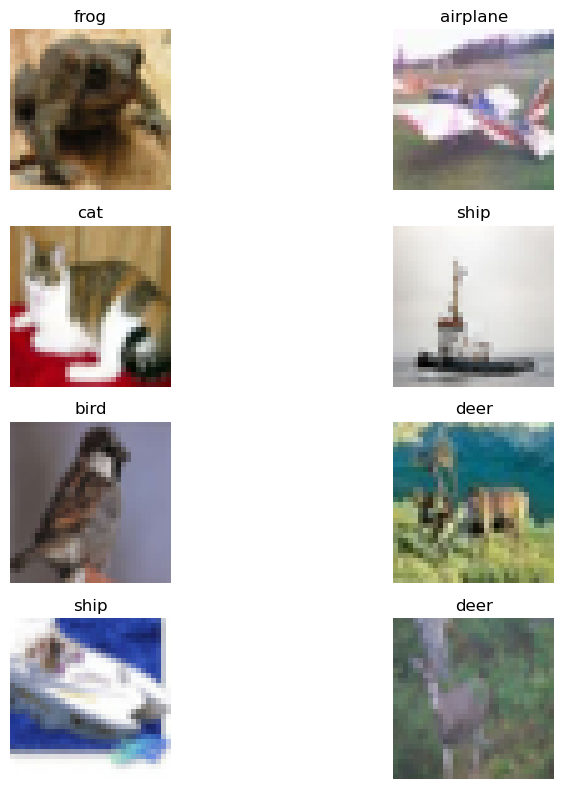

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def show_images(images, labels, classes, n_rows=4):
    batch_size = images.size(0)
    n_cols = batch_size // n_rows
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 8))

    for i, ax in enumerate(axes.ravel()):
        image = images[i].numpy().transpose((1, 2, 0))
        mean = np.array([0.5, 0.5, 0.5])
        std = np.array([0.5, 0.5, 0.5])
        image = std * image + mean
        image = np.clip(image, 0, 1)
        ax.imshow(image)
        ax.set_title(classes[labels[i]])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

    
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=8, shuffle=True)

dataiter = iter(train_loader)

images, labels = next(dataiter)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

show_images(images, labels, class_names)

In [3]:
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = x.view(-1, 16 * 16 * 16)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

cnn_model = SimpleCNN()

In [4]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn_model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = cnn_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

Epoch 1/5, Loss: 1.5419137820625306
Epoch 2/5, Loss: 1.2015868349218368
Epoch 3/5, Loss: 1.0518239373254776
Epoch 4/5, Loss: 0.9343266120052338
Epoch 5/5, Loss: 0.8280300570130348


Epoch 1/3, Loss: 0.7382157902753353, Accuracy: 73.948%
Epoch 2/3, Loss: 0.6478453145471216, Accuracy: 77.156%
Epoch 3/3, Loss: 0.5663353798097372, Accuracy: 80.026%


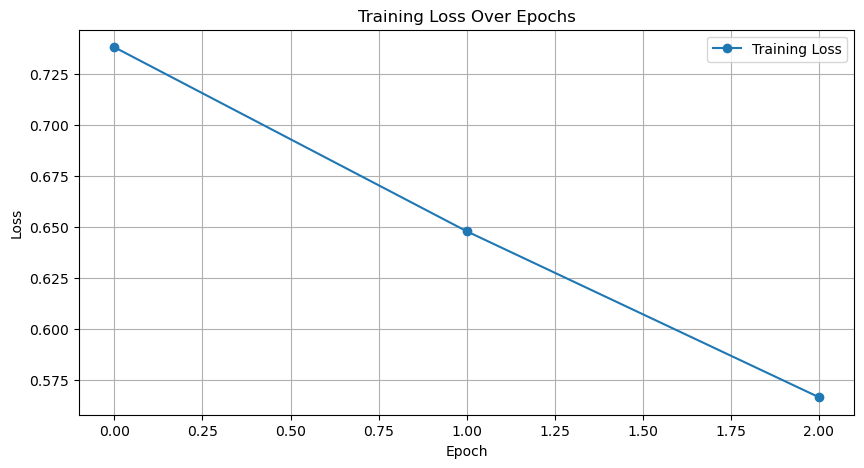

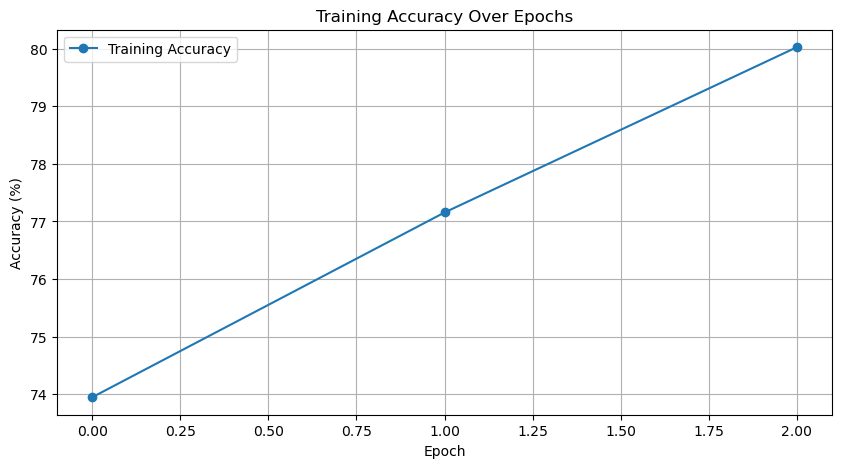

In [5]:
train_loss_history = []
train_accuracy_history = []

num_epochs = 3
for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = cnn_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    train_loss_history.append(epoch_loss)
    train_accuracy_history.append(epoch_accuracy)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Accuracy: {epoch_accuracy}%")

plt.figure(figsize=(10, 5))
plt.plot(train_loss_history, label='Training Loss', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_accuracy_history, label='Training Accuracy', marker='o')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


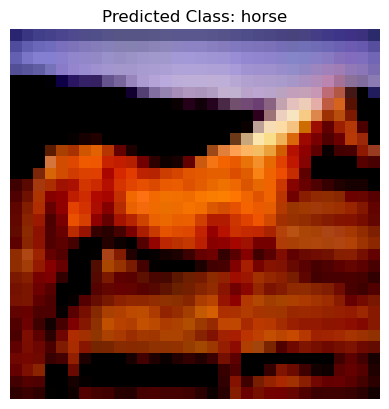

In [10]:
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=True)
dataiter = iter(test_loader)
test_image, test_label = next(dataiter)

predicted_class = class_names[torch.argmax(cnn_model(test_image)).item()]

# PyTorch tensor to a NumPy array for visualization
image_np = test_image.squeeze().permute(1, 2, 0).cpu().numpy()

plt.imshow(image_np)
plt.title(f"Predicted Class: {predicted_class}")
plt.axis('off')
plt.show()

In [12]:
torch.save(cnn_model.state_dict(), '(W11D1_CS) cnn_model.pth')

loaded_model = SimpleCNN()
loaded_model.load_state_dict(torch.load('(W11D1_CS) cnn_model.pth'))

<All keys matched successfully>